<a href="https://colab.research.google.com/github/MuqadirHussain/DeepLearning/blob/master/Fashion_MINST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu" ),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,030,218 (3.93 MB)

 Trainable params: 1,030,218 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=["accuracy"])

In [6]:
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 68ms/step - accuracy: 0.8076 - loss: 0.5278
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 63ms/step - accuracy: 0.9075 - loss: 0.2515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 147s 66ms/step - accuracy: 0.9256 - loss: 0.2029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.9429 - loss: 0.1540
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.9536 - loss: 0.1256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 63ms/step - accuracy: 0.9634 - loss: 0.0970
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 115s 62ms/step - accuracy: 0.9718 - loss: 0.0761
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 64ms/step - accuracy: 0.9774 - loss: 0.0596
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 120s 64ms/step - accuracy: 0.9824 - loss: 0.0476
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9859 - loss: 0.0386


In [7]:
from re import VERBOSE
#evaluting model
test_loss, test_accuracy=model.evaluate(test_images,test_labels,verbose=1)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9217 - loss: 0.3839
test set accuracy: 0.9229000210762024
test set loss: 0.36839139461517334


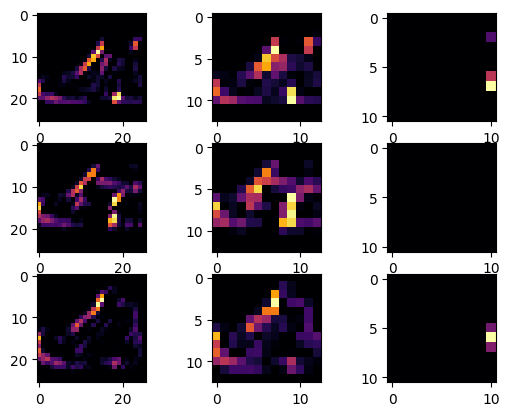

In [11]:
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
layers_to_visualize = [tf.keras.layers.Conv2D, tf.keras.layers.MaxPooling2D]

layer_outputs = [layer.output for layer in model.layers if type(layer) in layers_to_visualize]
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs=layer_outputs)

f, axarr = plt.subplots(3,len(layer_outputs))

for x in range(len(layer_outputs)):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1), verbose=False)[x]
    axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)